In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

## Masterclass Exercise 1 - Unbiased MD

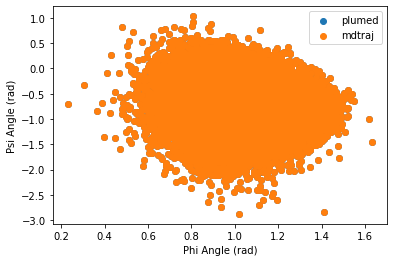

In [3]:
#load data
time, phi, psi = np.loadtxt('dialaB_unbiased_phi-psi.colvar', unpack=True)
traj = md.load_xtc('dialaB_unbiasedMD_N10000000.xtc', top='dialaB.pdb')

phi_angles = md.compute_phi(traj) 
psi_angles = md.compute_psi(traj)

plt.scatter(phi, psi, label = 'plumed') #from plumed

plt.scatter(phi_angles[1], psi_angles[1], label = 'mdtraj') #from mdtraj

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Psi Angle (rad)')
plt.legend()
plt.savefig('dialaB_unbiased_ramachandran')

plt.show()

complete overlap for plumed colvar data and angles computed via mdtraj!

In [6]:
# to obtain sigma values - between 1/3 and 1/2 of st dev of what we are biasing 

np.std(phi) * 5/12

0.05515906926461104

In [14]:
np.std(psi) * 5/12

0.14355601015364325

## Lugano Exercise 1 - Biased MD

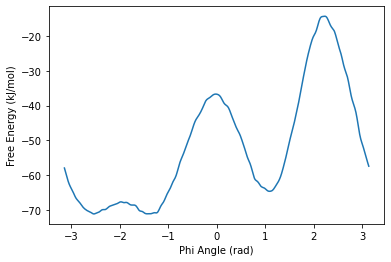

In [7]:
phi, energy, unknown = np.loadtxt('dialaB_metad_bias10_sigma0.055159.grid.dat', unpack=True)
plt.plot(phi, -energy)

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')

plt.savefig('dialaB_metad_fes_ex1')

plt.show()

## Lugano Exercise 2  - Free Energy Surfaces

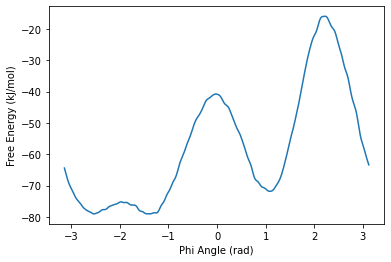

In [9]:
phi, energy, unknown = np.loadtxt('dialaB_metad_bias10_sigma0.055159.fes', unpack=True)

plt.plot(phi, energy)

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')

plt.savefig('dialaB_metad_fes_ex2')

plt.show()

looks the same as for exercise 1 but shifted down by 10 kJ/mol

In [31]:
## GIF to assess convergence

import glob
from PIL import Image

wd = '/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week6/TopologyB'

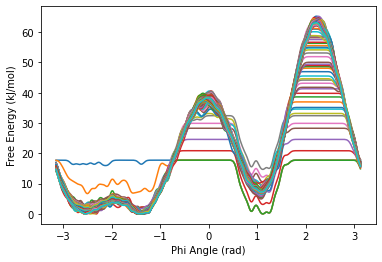

In [35]:
frames = []

for i in range(100):
    filename = f'dialaB_metad_bias10_sigma0.055159.100fes{i}.dat'
    phi, energy, unknown = np.loadtxt(filename, unpack=True)

    plt.plot(phi, energy)

    plt.xlabel('Phi Angle (rad)')
    plt.ylabel('Free Energy (kJ/mol)')

    savename = f'dialaB_metad_fes100_ex2_frame{i}'
    plt.savefig(savename)
    
    frame = [Image.open(image) for image in glob.glob(f"{savename}.png")]
    frames.append(frame[0])
    
frame_one = frames[0]
frame_one.save(f'{wd}/dialaB_metad_fes100_ex2.gif', format="GIF", append_images=frames,
           save_all=True, duration=100, loop=0)

plt.savefig('dialaB_metad_fes100_ex2')
plt.show()

## 2D Metadynamics

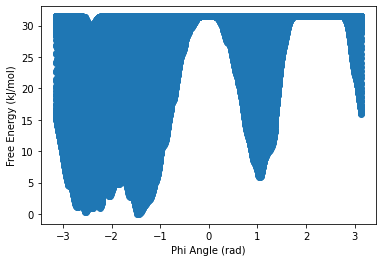

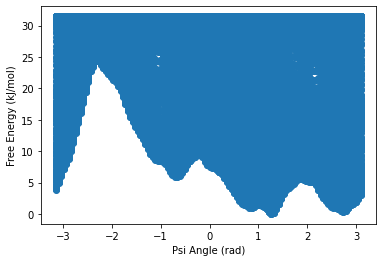

In [30]:
# plot an arbitrary surface for visualization purposes 

i=52
filename = f'dialaB_2Dmetad_N5000000_bias10_sigma0.055-0.14.100fes{i}.dat'


phi, psi, energy, unknown1, unknown2 = np.loadtxt(filename, unpack=True)

plt.scatter(phi, energy)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.show()

plt.scatter(psi, energy)
plt.xlabel('Psi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.show()

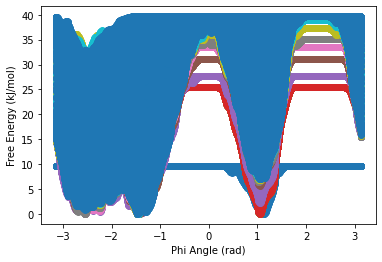

In [39]:
# make gif 

frames = []

for i in range(101):
    if i%10==0:
        filename = f'dialaB_2Dmetad_N5000000_bias10_sigma0.055-0.14.100fes{i}.dat'
        phi, psi, energy, unknown1, unknown2 = np.loadtxt(filename, unpack=True)

        plt.scatter(phi, energy)
        plt.xlabel('Phi Angle (rad)')
        plt.ylabel('Free Energy (kJ/mol)')

        savename = f'dialaB_2Dmetad_fes100_frame{i}'
        plt.savefig(savename)

        frame = [Image.open(image) for image in glob.glob(f"{savename}.png")]
        frames.append(frame[0])
    
frame_one = frames[0]
frame_one.save(f'{wd}/dialaB_2Dmetad_fes100.gif', format="GIF", append_images=frames,
           save_all=True, duration=100, loop=0)

plt.show()